## Aileen Liu -- aml2377

# Art of Engineering
## Biomedical Engineering Departmental Project

### <span style="color:red">Assignment 2</span> - MNIST Classification using LeNet

#### Due date/time: <span style="color:red">November 4, 05:00 pm</span>

#### Instructions:
1. You may use any publicly available resources to answer the questions, but you need to ***cite*** them properly to prevent plagiarism.
2. Using or copying other students' solutions is considered cheating, and you'll be graded **"0" for the entire assignment**.
3. You may be asked to write Python code or to explain something in each question. To write your answers, please use code and markdown blocks, respectively. If you need to better organize your answers, you may add more blocks. In this notebook, we placed a code block with a comment as `# [Your code here]` and a markdown block with the text "<span style="color:red">Your answer here</span>" for each question that needs them. If you wish to answer, please remove the comments first.
4. Please ***use comments at the beginning of each code blocks*** to explain what you've implemented in that block.
5. Please ***use LaTex formatting to write equations and formulas*** in markdown blocks wherever is needed.
6. Please define your variables with ***short and meaningful names***.
7. Please make sure ***internet access is granted*** on the settings panel.
8. For this assignment, you ***need GPU access***. Please set the "Accelerator" as "GPU" on the "Setting" panel.

#### How to submit:
Kaggle automatically saves the notebook after few seconds, and you may close the notebook and come back later to complete it. However, we need you to do the following steps to ensure your answers are visible to us for grading purposes. Thus, after you finished your answers, please:
1. Rename the notebook as "AoE_BME_Assignment2".
2. Click on the "Save Version" button on the top-right side of the window.
3. On the save popup, save your notebook with: \
    3.1 If the scripts run fast, the "Save & Run All (Commit)" option, \
    3.2 If the scripts run slow, such as training networks, etc., and you are satisfied with the outputs of code blocks, "Quick Save" option.
4. Click on the "Save" button and let the Kaggle saves your notebook.
5. Then click on the "Share" button.
6. On the share popup, change "Private" to "Public".
7. Copy the "Public url", and click on the "Save" button.
8. Paste the "Public url" address on the related assignment on the [CourseWorks](https://courseworks2.columbia.edu/) and submit it.

**Note:**
1. You may save multiple versions of your notebook, but the latest version is considered as your final answer.
2. If you wish us to grade your answers based on a different version of your notebook other than the latest version, please duplicate this template, copy your answers from your desired version, and follow the same procedure to submit. Again, make sure the name of the notebook remains as the current template.
3. Do not change or save the notebook after the due date/time as it will be considered a late submission and causes a decrease in your final grade.

#### <span style="color:red">(0 pts.) Q0. </span> 
#### a. Import the packages you need similar to the notebook of the Lecture 3 - Part C. 
#### b. Check if the GPU is available.
#### c. Set the random seed for both Pytorch and Numpy as 1102

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow.keras.datasets.mnist as MNIST

#check if GPU available
cuda = torch.cuda.is_available()
print ("GPU available:", cuda)

#set random seeds
torch.manual_seed(1102)
np.random.seed(1102)

GPU available: True


#### <span style="color:red">(5 pts.) Q1. </span> 
#### a. Download the MNIST dataset using MNIST package. (Make sure the images and labels for both training set and test set are downloaded correctly)
#### b. Using `train_test_split` function, split training set into a new training set and validation set by a ratio of 20%.
#### c. Print the number of samples, minimum and maximum intensity, and the shape of the images matrix for all three sets.

In [2]:
#download MNIST dataset
(original_train_imgs, original_train_labels), (test_imgs, test_labels) = MNIST.load_data()

#split training set into new training set and validation set (20% ratio)
train_indices, valid_indices = train_test_split(range(len(original_train_imgs)), test_size = 0.2)
train_imgs = original_train_imgs[train_indices, :,:]
train_labels = original_train_labels[train_indices]
valid_imgs = original_train_imgs[valid_indices,:,:]
valid_labels = original_train_labels[valid_indices]

#print num of samples, min/max intensity, and shape of images matrix for each set
print(f"Training: sample number: {len(train_imgs)}, min: {train_imgs.min()}, max: {train_imgs.max()}, shape {train_imgs.shape}\n\
Validation: sample number: {len(valid_imgs)}, min: {valid_imgs.min()}, max: {valid_imgs.max()}, shape {valid_imgs.shape}\n\
Testing: sample number: {len(test_imgs)}, min: {test_imgs.min()}, max: {test_imgs.max()}, shape {test_imgs.shape}")

11493376/11490434 [==============================] - 0s 0us/step
Training: sample number: 48000, min: 0, max: 255, shape (48000, 28, 28)
Validation: sample number: 12000, min: 0, max: 255, shape (12000, 28, 28)
Testing: sample number: 10000, min: 0, max: 255, shape (10000, 28, 28)


In [3]:
# # check that training and test sets downloaded correctly
# row = 2
# col = 8
# fig = plt.figure (figsize = (20, 5))
# fig.suptitle ("Test Set Images and Labels")
# for image_index in range (1, row * col + 1):
#     image = MNIST_test_imgs[image_index, :, :]
#     ax = fig.add_subplot(row, col, image_index)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.title.set_text(str(MNIST_test_labels[image_index]))
#     plt.imshow(image, cmap = "gray")
    
# fig2 = plt.figure (figsize = (20, 5))
# fig2.suptitle ("Training Set Images and Labels")
# for image_index in range (1, row * col + 1):
#     image = MNIST_train_imgs[image_index, :, :]
#     ax = fig2.add_subplot(row, col, image_index)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.title.set_text(str(MNIST_train_labels[image_index]))
#     plt.imshow(image, cmap = "gray")
    
# plt.show()

#### <span style="color:red">(5 pts.) Q2. </span> Display 24 first samples pulled from each set (train, validation, and test) and show the true labels as the title per each sample. 
**Note:** Display all 24 samples pulled from each set in one plot as in four rows and six columns. Thus, we will expect three plots for training, validation, and test set.

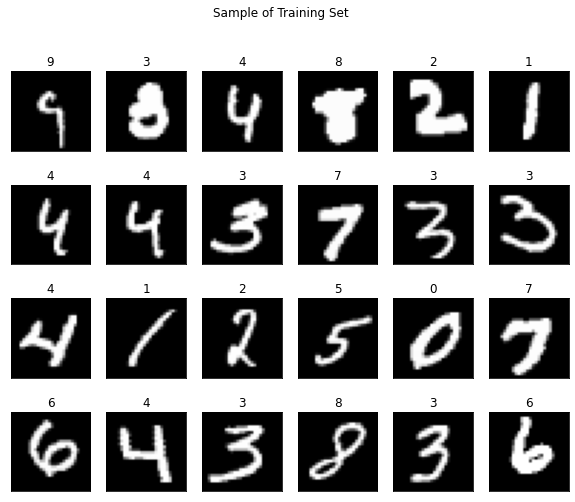

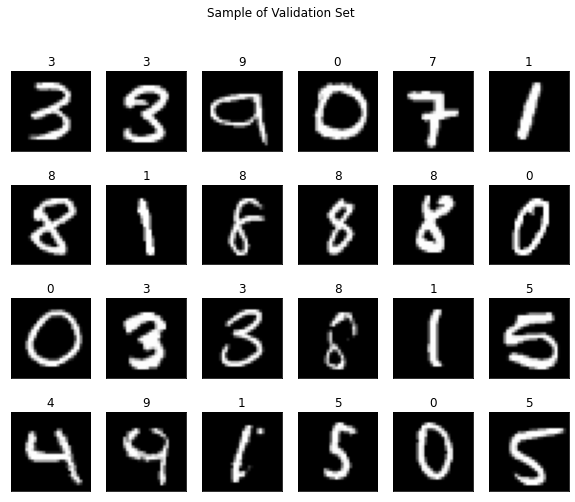

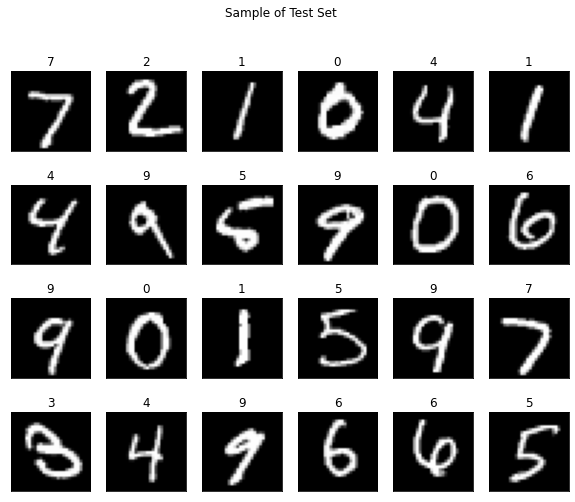

In [4]:
#4x6 plots
row = 4
col = 6

#display first 24 samples from each set, with labels as titles for each sample
train_fig = plt.figure (figsize = (10, 8))
train_fig.suptitle ("Sample of Training Set")
for index in range (row * col):
    image = train_imgs[index, :, :]
    ax = train_fig.add_subplot(row, col, index + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(str(train_labels[index]))
    plt.imshow(image, cmap = "gray")
    
valid_fig = plt.figure (figsize = (10, 8))
valid_fig.suptitle ("Sample of Validation Set")
for index in range(row * col):
    image = valid_imgs[index, :, :]
    ax = valid_fig.add_subplot(row, col, index + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(str(valid_labels[index]))
    plt.imshow(image, cmap = "gray")
    
test_fig = plt.figure (figsize = (10, 8))
test_fig.suptitle ("Sample of Test Set")
for index in range (row * col):
    image = test_imgs[index, :, :]
    ax = test_fig.add_subplot(row, col, index + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(str(test_labels[index]))
    plt.imshow(image, cmap = "gray")
    
plt.show()

#### <span style="color:red">(8 pts.) Q3. </span> 
#### a. Similar to the lecture, reformat all samples and create a `DataLoader` of batch size 100 for each set. 
#### b. Print the total number of batches in each `DataLoader`. (You can use `len()` function on `DataLoader`)
**Note:** Do not forget to add one axis for channels. The Pytorch's tensor format is (BatchSize, Channel, Width, Height).

In [5]:
#for each set, reformat and create dataloader, then print number of batches
train_imgs_torch = torch.from_numpy(train_imgs).type(torch.FloatTensor).view(-1, 1, 28, 28) 
train_labels_torch = torch.from_numpy(train_labels).type(torch.LongTensor)
train_data = TensorDataset(train_imgs_torch, train_labels_torch)
train_loader = DataLoader(train_data, batch_size = 100, shuffle = True)
print (f"Batches in Train DataLoader: {len(train_loader)}")

valid_imgs_torch = torch.from_numpy(valid_imgs).type(torch.FloatTensor).view(-1,1,28,28)
valid_labels_torch = torch.from_numpy(valid_labels).type(torch.LongTensor)
valid_data = TensorDataset(valid_imgs_torch, valid_labels_torch)
valid_loader = DataLoader(valid_data, batch_size = 100, shuffle = False)
print (f"Batches in Validation DataLoader: {len(valid_loader)}")

test_imgs_torch = torch.from_numpy(test_imgs).type(torch.FloatTensor).view(-1,1,28,28)
test_labels_torch = torch.from_numpy(test_labels).type(torch.LongTensor)
test_data = TensorDataset(test_imgs_torch, test_labels_torch)
test_loader = DataLoader(test_data, batch_size = 100, shuffle = False)
print (f"Batches in Test DataLoader: {len(test_loader)}")

# help(view)

#check tensor's format is (BatchSize, Channel, Width, Height)
# valid_batch_index, (valid_batch_imgs, valid_batch_labels) = list(enumerate (valid_loader))[0]
# print (valid_batch_imgs.shape)

Batches in Train DataLoader: 480
Batches in Validation DataLoader: 120
Batches in Test DataLoader: 100


#### <span style="color:red">(12 pts.) Q4. </span> Using the lecture's notebook on LeNet, define a model as the following table:
| Layer Number | Layer Type   | Number of kernels | Kernel size | Activation | Stride | Zero-Padding |
| ------------ | ------------ | ----------------- | ----------- | ---------- | ------ | ------------ |
| 1            | Conv2D       | 32                | 5x5         | ReLU       | 1      | 0            |
| 2            | MaxPooling2D | NA                | 2x2         | NA         | 2      | 0            |
| 3            | Conv2D       | 64                | 3x3         | ReLU       | 1      | 0            |
| 4            | MaxPooling2D | NA                | 2x2         | NA         | 2      | 0            |
| 5            | Conv2D       | 128               | 2x2         | ReLU       | 1      | 0            |
| 6            | MaxPooling2D | NA                | 2x2         | NA         | 2      | 0            |
| 7            | Faltten      | NA                | NA          | NA         | NA     | NA           |
| 8            | FC (Linear)  | 128               | NA          | ReLU       | NA     | NA           |
| 9            | FC (Linear)  | 64                | NA          | Sigmoid    | NA     | NA           |
| 10           | FC (Linear)  | 10                | NA          | SoftMax    | NA     | NA           |
**Note:** **NA** means not applicable.

#### Then create an instance of the model and load it on the GPU by calling the `.cuda()` function.

In [6]:
class my_CNN_Model(nn.Module):
    '''(ConvNet -> ReLU -> Max_Pool) x3 -> Flatten -> FC -> ReLU -> FC -> Sigmoid -> FC -> SoftMax'''
    def __init__(self):
        '''Define model modules.'''
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 2, 1)
        self.fc1 = nn.Linear(4 * 128, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        '''Define the model architecture (the sequence to place the model modules).'''
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 128)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return F.softmax(self.fc3(x), dim = 1)

my_CNN = my_CNN_Model() #create instance of model
my_CNN.cuda() #mount model to gpu

# help(torch.nn.Linear)

my_CNN_Model(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

#### <span style="color:red">(10 pts.) Q5. </span> Knowing the input shape of each image in the MNIST dataset is $28\times28$, write the shape of the output tensor for each layer of the model.
**Note:** You can use the following formula: \
Assuming the input shape is: $(B, Ch_{in}, W_{in}, H_{in})$, and the output shape is $(B, Ch_{out}, W_{out}, H_{out})$ \
1. For the `Conv2D` layers with $N$ number of $K\times K$ kernels, zero-padding $P$, and stride $S$:
$$
W_{out} \text{ or } H_{out} = \lfloor {\frac{W_{in} \text{ or } H_{in} + 2P - K }{S}} + 1 \rfloor
$$
$\lfloor . \rfloor$ means integer floor.

And the number of channels for the output will be $Ch_{out} = N$

2. Similarly for the `Maxpooling` layers of size $K \times K$, zero-padding $P$, and stride $S$:
$$
W_{out} \text{ or } H_{out} = \lfloor {\frac{W_{in} \text{ or } H_{in} + 2P - K }{S}} + 1 \rfloor
$$

The only difference is that the number of channels for the output will be $Ch_{out} = Ch_{in}$

3. For `Linear` (Also known as Fully-Connected) layers, the input is a vector of $(B, D_{in})$. Assuming the layer has $N$ number of neurons, the output is a vector of size $(B, N)$.

**Note:** $B$ stands for the batch size.


Going by layer number
1. `Conv2D` with $32$ $5x5$ kernels, padding $ = 0$, stride-length $ = 1$
- $ W_{out} = \lfloor {\frac{28 + 2(0) - 5 }{1}} + 1 \rfloor, W_{out} = 24$
- output shape: $(100, 32, 24, 24)$
2. `Maxpooling` with $2x2$ kernels, padding $ = 0$, stride-length $ = 2$
- $ W_{out} = \lfloor {\frac{24 + 2(0) - 2 }{2}} + 1 \rfloor, W_{out} = 12$
- output shape: $(100, 32, 12, 12)$
3. `Conv2D` with $64$ $3x3$ kernels, padding $ = 0$, stride length $ = 1$
- $ W_{out} = \lfloor {\frac{12 + 2(0) - 3 }{1}} + 1 \rfloor, W_{out} = 10$
- output shape: $(100, 64, 10, 10)$
4. `Maxpooling` with $2x2$ kernels, padding $ = 0$, stride-length $ = 2$
- $ W_{out} = \lfloor {\frac{10 + 2(0) - 2 }{2}} + 1 \rfloor, W_{out} = 5$
- output shape: $(100, 64, 5, 5)$
5. `Conv2D` with $128$ $2x2$ kernels, padding = $0$, stride length = $1$
- $ W_{out} = \lfloor {\frac{5 + 2(0) - 2 }{1}} + 1 \rfloor, W_{out} = 4$
- output shape: $(100, 128, 4, 4)$
6. `Maxpooling` with $2x2$ kernels, padding $ = 0$, stride-length $ = 2$
- $ W_{out} = \lfloor {\frac{4 + 2(0) - 2 }{2}} + 1 \rfloor, W_{out} = 2$
- output shape: $(100, 128, 2, 2)$
7. `Flatten`
- output shape: $(100, 512)$
8. `Linear` with $128$ kernels
- output shape: $(100, 128)$
9. `Linear` with $64$ kernels
- output shape: $(100, 64)$
10. `Linear` with $10$ kernels
- output shape: $(100, 10)$


#### <span style="color:red">(5 pts.) Q6. </span> Define an SGD optimizer with a learning rate of $10^{-3}$ on the parameters of the model.

In [7]:
optimizer = SGD(my_CNN.parameters(), lr = 10**-3)
# print (optimizer)
# help(SGD)

#### <span style="color:red">(25 pts.) Q7. </span> Similar to the example on LeNet, train your network on a train set for 50 epochs. Use the "Cross-Entropy" (`F.cross_entropy`) as the loss function. 
#### At the end of each epoch, save the model, test the model on the validation set, and keep the training and validation loss for later. 
**Note:** Remember that the loss is calculated for each batch; thus, you need to take the average loss over all batches as the epoch loss for both training and validation phases.

In [8]:
# help(optimizer.zero_grad)

In [9]:
!mkdir saved_models_my_CNN
!ls
epoch_num = 50

train_epoch_loss = []
validation_epoch_loss = []

for epoch in range(epoch_num):
    train_loss = []
    validation_loss = []
    
    for train_batch_index, (train_batch_imgs, train_batch_labels) in enumerate(train_loader):
        #batch_index is self-explanatory -> ie. if you're on the first batch of 100, batch_index = 0
        #images and labels are essentially each a list of those respective values for a given batch -> ie. 100 28x28 images, 100 labels
#         print (f"batch: {batch_index}")
#         print (f"image size: {images.shape}")
#         print (f"Labels: {labels}")
        
        my_CNN.train()
        train_label_predicted = my_CNN(train_batch_imgs.cuda())

        #compute loss
        loss = F.cross_entropy(torch.log(train_label_predicted), train_batch_labels.cuda())
        train_loss.append(loss.detach().cpu().item()) 
        
        #reset gradient
        optimizer.zero_grad()
        #backpropagate loss
        loss.backward()
        #update parameters
        optimizer.step()
        
    #validation
    my_CNN.eval()
    for valid_batch_index, (valid_batch_imgs, valid_batch_labels) in enumerate (valid_loader):
        validation_label_predicted = my_CNN(valid_batch_imgs.cuda())
        loss = F.cross_entropy(torch.log(validation_label_predicted), valid_batch_labels.cuda()) #<- this is where the issue was! needed to do log for cross_entropy
        validation_loss.append(loss.cpu().data.item())
    
    #save losses for later comparison
    train_epoch_loss.append(np.mean(train_loss))
    validation_epoch_loss.append(np.mean(validation_loss))
    
    #save and print models
    torch.save(my_CNN.state_dict(), './saved_models_my_CNN/checkpoint_epoch_%s.pth' % (epoch))
    print(f"Epoch: {epoch} | train loss {train_epoch_loss[-1]} | validation loss: {validation_epoch_loss[-1]}")

__notebook__.ipynb  saved_models_my_CNN
Epoch: 0 | train loss 2.080791813880205 | validation loss: 1.8989779939254126
Epoch: 1 | train loss 1.7565933093428612 | validation loss: 1.6409586528937021
Epoch: 2 | train loss 1.5357733969887097 | validation loss: 1.4381024758021037
Epoch: 3 | train loss 1.3556206526855628 | validation loss: 1.2816326628128687
Epoch: 4 | train loss 1.1978924681742986 | validation loss: 1.1325316061576207
Epoch: 5 | train loss 1.0634883306920528 | validation loss: 1.0117745245496432
Epoch: 6 | train loss 0.9483662713319063 | validation loss: 0.8997532079617182
Epoch: 7 | train loss 0.8452645993481079 | validation loss: 0.7987327381968499
Epoch: 8 | train loss 0.7563494068880876 | validation loss: 0.7183964530626933
Epoch: 9 | train loss 0.679154630874594 | validation loss: 0.6595413481195768
Epoch: 10 | train loss 0.6120081450790167 | validation loss: 0.5819542571902275
Epoch: 11 | train loss 0.5531532975534598 | validation loss: 0.5315979450941086
Epoch: 12 | 

#### <span style="color:red">(5 pts.) Q8. </span> Plot the learning curve and indicate in which epoch the model achieved the lowest validation loss.
**Note:** The learning curve is a plot that shows the training and validation loss for each epoch.

best epoch: 48


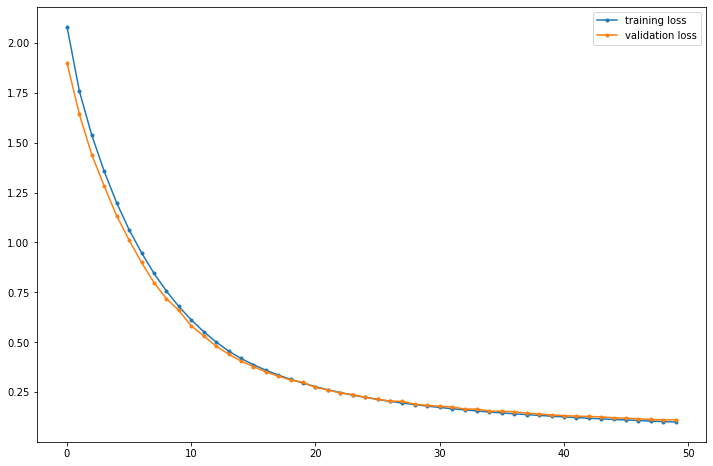

In [10]:
#plot learning curve
plt.figure(figsize = (12, 8))
plt.plot(train_epoch_loss, '-o', label = "training loss", markersize = 3)
plt.plot(validation_epoch_loss, '-o', label = "validation loss", markersize = 3)
plt.legend(loc = "upper right")

#print lowest validation loss epoch
best_epoch = np.argmin(validation_epoch_loss)
print (f"best epoch: {best_epoch}")

#### <span style="color:red">(20 pts.) Q9. </span> 
#### a. Load the weights of the best epoch and test the model on the test set.
#### b. Test the model on the first sample of the test set and plot the output probabilities.
#### c. Print the overall accuracy of the model on the test set. Accuracy formula is $Accuracy=\frac{\text{Number of correct prediction}}{\text{Total Number of samples}}$
#### d. Plot the confusion matrix for the test set.

**Note:** The testing phase is similar to the validation phase. You need to loop through batches of the test loader and keep the true labels and predicted labels for accuracy and confusion matrix.

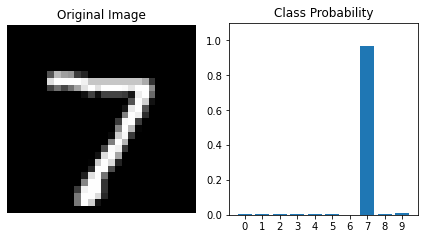

Overall Accuracy: 98.62 %


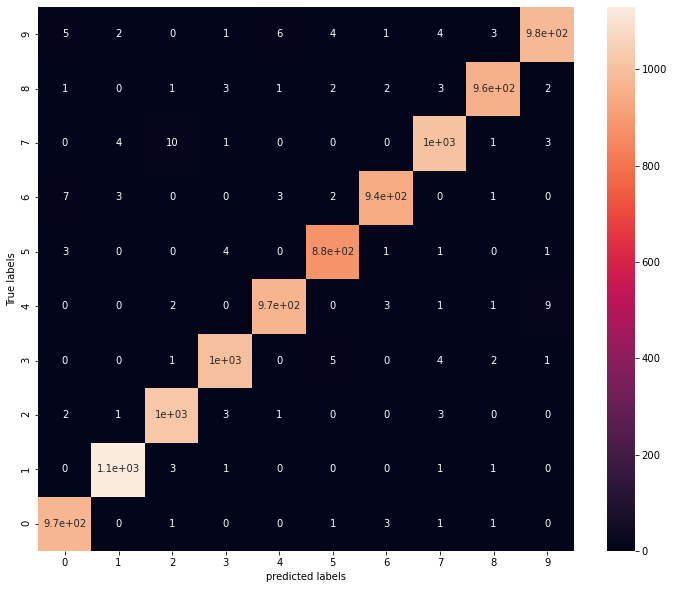

In [11]:
##part a
#load weights of best epoch
state_dict = torch.load('./saved_models_my_CNN/checkpoint_epoch_%s.pth' % (best_epoch))
# for x in state_dict:
#     print (x, "\t", state_dict[x].size())
my_CNN.load_state_dict(state_dict)

#test model on test set
all_predicted_labels = []
for test_batch_index, (test_batch_images, test_batch_labels) in enumerate(test_loader):
    my_CNN.eval()
    
    #use model w/ best parameters to get a prediction
    predicted_label = my_CNN(test_batch_images.cuda())
    label_predicted_probability, label_predicted_index = torch.max(predicted_label.data, 1)
    
    #add each prediction to entire list of predictions
    for current_prediction in label_predicted_index:
        all_predicted_labels.append(current_prediction.detach().cpu().numpy().item())
    
##part b: test model on first sample of test set
def view_classification(image, model):
    '''function to view image and its predicted classes'''
    model.eval()
    
    #np.newaxis just adds another dimension so the sample image has a channel dimension
    torched_img = torch.from_numpy(image).type(torch.FloatTensor)[np.newaxis,np.newaxis,:,:]
    probabilities = model(torched_img.cuda()) #remember to send input tensor to the gpu (bc model is mounted there!)
    probabilities = probabilities.detach().cpu().numpy().squeeze() #copies tensor, returns copy to cpu, turns into numpy array, removes extra dimension
    
    #plot original image
    fig, (ax1, ax2) = plt.subplots(figsize = (6,9), ncols = 2)
    ax1.imshow(image, cmap = "gray")
    ax1.set_title("Original Image")
    ax1.axis("off")
    
    #plot probability bar chart
    ax2.bar(np.arange(10), probabilities)
    ax2.set_aspect(10)
    ax2.set_xticks(np.arange(10))
    ax2.set_title("Class Probability")
    ax2.set_ylim(0, 1.1)
    
    #show plots
    plt.tight_layout()
    plt.show()

#show probabilities for first sample of test set
view_classification(test_imgs[0,:,:], my_CNN) 

##part c: print accuracy over entire test set
accuracy = accuracy_score(test_labels, all_predicted_labels)
print("Overall Accuracy: {:.2f} %".format(accuracy * 100)) #yay for formatting shortcuts

##part d: confusion matrix
CM = confusion_matrix(test_labels, all_predicted_labels)

plt.figure(figsize = (12,10))
sns.heatmap(CM, annot = True, annot_kws = {"size": 10})
plt.ylim([0, 10])
plt.ylabel('True labels')
plt.xlabel('predicted labels')
plt.show()

#### <span style="color:red">(5 pts.) Q10. </span> Compare the performance of your architecture with the LeNet performance. Which one performs better on the MNIST classification? Can you suggest any method to improve either of the models?

This architecture performs slightly better on MNIST classification than the LeNet architecture from the Lecture 3C tutorial (accuracy of ~98.6% vs ~96.8%). They are largely the same, although this one uses 1 extra 2D convolution, has smaller kernels for the second 2D convolution, and uses a ReLU activation for the first fully connected layer (instead of sigmoid). Perhaps using a ReLU activation for the second FC layer might continue to improve this model, since ReLU activation is stronger and results in better convergence performance than sigmoid. (Just testing in the example below, 25 epochs with this modified architecture is enough to get to a similar accuracy level as 50 epochs in the original architecture)

__notebook__.ipynb  saved_models_mod_CNN  saved_models_my_CNN
Epoch: 0 | train loss 0.6012839300868412 | validation loss: 0.24478155889858802
Epoch: 1 | train loss 0.1736847242883717 | validation loss: 0.16738261183102926
Epoch: 2 | train loss 0.12934937252042195 | validation loss: 0.1275668963479499
Epoch: 3 | train loss 0.10782100593593592 | validation loss: 0.1398385784899195
Epoch: 4 | train loss 0.09493310187632839 | validation loss: 0.09929994813477
Epoch: 5 | train loss 0.08446471100323834 | validation loss: 0.0903955899955084
Epoch: 6 | train loss 0.07709858019952662 | validation loss: 0.07945290749582151
Epoch: 7 | train loss 0.07070132081280463 | validation loss: 0.08381615537218749
Epoch: 8 | train loss 0.06510191540194986 | validation loss: 0.0828140583820641
Epoch: 9 | train loss 0.061098827613750475 | validation loss: 0.06764436097194751
Epoch: 10 | train loss 0.0575758462829981 | validation loss: 0.07589207656371097
Epoch: 11 | train loss 0.05447533111243198 | validation

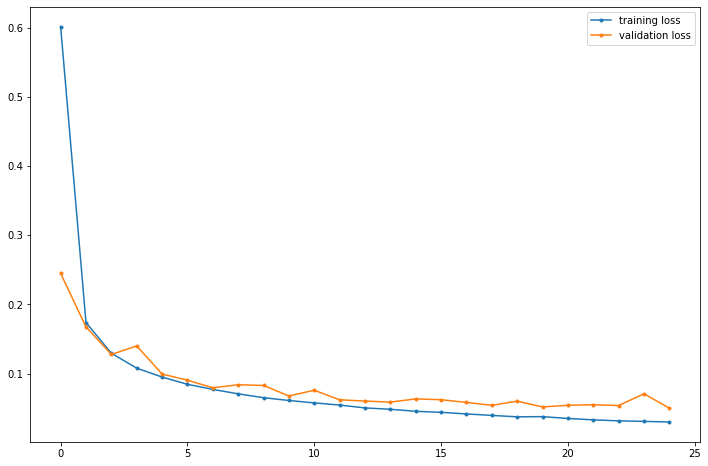

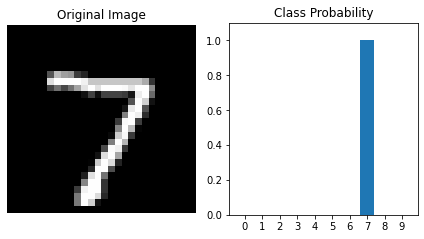

Overall Accuracy: 98.65 %


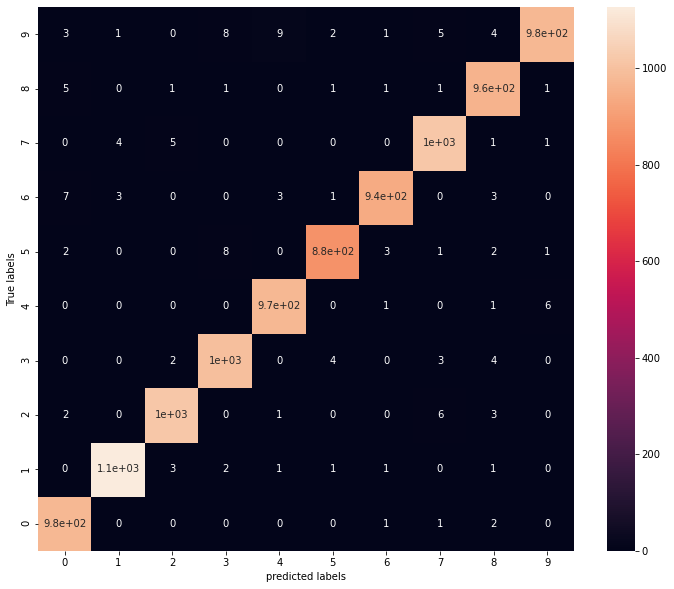

In [12]:
class mod_CNN_Model(nn.Module):
    '''(ConvNet -> ReLU -> Max_Pool) x3 -> Flatten -> FC -> ReLU -> FC -> Sigmoid -> FC -> SoftMax'''
    def __init__(self):
        '''Define model modules.'''
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 2, 1)
        self.fc1 = nn.Linear(4 * 128, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        '''Define the model architecture (the sequence to place the model modules).'''
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.softmax(self.fc3(x), dim = 1)

mod_CNN = mod_CNN_Model() #create instance
mod_CNN.cuda() #mount to GPU

#create new optimizer
mod_optimizer = SGD(mod_CNN.parameters(), lr = 10**-3)

#create new file location
!mkdir saved_models_mod_CNN
!ls

#smaller epoch number needed
mod_epoch_num = 25

mod_train_epoch_loss = []
mod_validation_epoch_loss = []

for epoch in range(mod_epoch_num):
    train_loss = []
    validation_loss = []
    
    for train_batch_index, (train_batch_imgs, train_batch_labels) in enumerate(train_loader):
        #batch_index is self-explanatory -> ie. if you're on the first batch of 100, batch_index = 0
        #images and labels are essentially each a list of those respective values for a given batch -> ie. 100 28x28 images, 100 labels
#         print (f"batch: {batch_index}")
#         print (f"image size: {images.shape}")
#         print (f"Labels: {labels}")
        
        #get predictions on training set
        mod_CNN.train()
        train_label_predicted = mod_CNN(train_batch_imgs.cuda())

        #compute loss
        loss = F.cross_entropy(torch.log(train_label_predicted), train_batch_labels.cuda())
        train_loss.append(loss.detach().cpu().item()) 
        
        #reset gradient
        mod_optimizer.zero_grad()
        #backpropagate loss
        loss.backward()
        #update parameters
        mod_optimizer.step()
        
    #validation
    mod_CNN.eval()
    for valid_batch_index, (valid_batch_imgs, valid_batch_labels) in enumerate (valid_loader):
        validation_label_predicted = mod_CNN(valid_batch_imgs.cuda())
        loss = F.cross_entropy(torch.log(validation_label_predicted), valid_batch_labels.cuda()) #remember to take log of predictions for cross_entropy loss
        validation_loss.append(loss.cpu().data.item())
    
    #save losses for later comparison
    mod_train_epoch_loss.append(np.mean(train_loss))
    mod_validation_epoch_loss.append(np.mean(validation_loss))
    
    #save and print models
    torch.save(mod_CNN.state_dict(), './saved_models_mod_CNN/checkpoint_epoch_%s.pth' % (epoch))
    print(f"Epoch: {epoch} | train loss {mod_train_epoch_loss[-1]} | validation loss: {mod_validation_epoch_loss[-1]}")
    
#plot learning curve
plt.figure(figsize = (12, 8))
plt.plot(mod_train_epoch_loss, '-o', label = "training loss", markersize = 3)
plt.plot(mod_validation_epoch_loss, '-o', label = "validation loss", markersize = 3)
plt.legend(loc = "upper right")

#print lowest validation loss epoch
mod_best_epoch = np.argmin(mod_validation_epoch_loss)
print (f"best epoch: {mod_best_epoch}")

#load weights of best epoch and test model 
mod_state_dict = torch.load('./saved_models_mod_CNN/checkpoint_epoch_%s.pth' % (mod_best_epoch))
mod_CNN.load_state_dict(mod_state_dict)

#test model on test set
mod_all_predicted_labels = []
for test_batch_index, (test_batch_images, test_batch_labels) in enumerate(test_loader):
    mod_CNN.eval()
    
    #use model w/ best parameters to get a prediction
    predicted_label = mod_CNN(test_batch_images.cuda())
    label_predicted_probability, label_predicted_index = torch.max(predicted_label.data, 1)
    
    #add each prediction to entire list of predictions
    for current_prediction in label_predicted_index:
        mod_all_predicted_labels.append(current_prediction.detach().cpu().numpy().item())

#test model on first sample of test set
view_classification(test_imgs[0,:,:], mod_CNN) 

#print accuracy over entire test set
mod_accuracy = accuracy_score(test_labels, mod_all_predicted_labels)
print("Overall Accuracy: {:.2f} %".format(mod_accuracy * 100))

#confusion matrix
mod_CM = confusion_matrix(test_labels, mod_all_predicted_labels)
plt.figure(figsize = (12,10))
sns.heatmap(mod_CM, annot = True, annot_kws = {"size": 10})
plt.ylim([0, 10])
plt.ylabel('True labels')
plt.xlabel('predicted labels')
plt.show()